## 논리게이트 (Logic gate) 클래스 구현

In [7]:
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [8]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2 * delta_x)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [24]:
class LogicGate:
    def __init__(self, gate_name, xdata, tdata):
        self.name = gate_name
        self.xdata = xdata.reshape(4, 2)
        self.tdata = tdata.reshape(4, 1)
        self.W = np.random.rand(self.xdata.shape[1], 1)
        self.b = np.random.rand(1)
        self.learning_rate = 1e-2
        
        # 입력, 정답, 가중치 W, 바이어스 b, 학습률 learning rate 초기화
        
    def loss_func(self):
        delta = 1e-7   # 무한대 발산 방지
        z = np.dot(self.xdata, self.W) + self.b
        y = sigmoid(z)
        return -np.sum(self.tdata * np.log(y + delta) + (1-self.tdata) * np.log((1 - y) + delta))
    
    # 경사하강법을 이용하여 W, b 업데이트
    def train(self):
        f = lambda x: self.loss_func()   # x는 의미없고, loss_func()를 호출하기 위해 사용
        print("Initial loss value =", self.loss_func())
        
        for step in range(0, 8001):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
            
            if (step % 1000 == 0):
                print("step =", step, "| loss value =", self.loss_func())
                
    # 미래값 예측
    def predict(self, input_data):
        z = np.dot(input_data, self.W) + self.b
        y = sigmoid(z)
        
        if y > 0.5:
            result = 1
        else:
            result = 0
            
        return y, result
    
    # 정확도 예측 함수
    def accuracy(self, test_xdata, test_tdata):
        matched_list = []
        not_matched_list = []
        
        for index in range(len(xdata)):
            (real_val, logical_val) = self.predict(test_xdata[index])
            if logical_val == test_tdata[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        accuracy_val = len(matched_list) / len(test_xdata)
        
        return accuracy_val

### AND 논리 게이트 검증

In [25]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 0, 0, 1])
AND_obj = LogicGate("AND_GATE", xdata, tdata)
AND_obj.train()

Initial loss value = 3.4486623043310196
step = 0 | loss value = 3.4124436453163605
step = 1000 | loss value = 0.9925858273383898
step = 2000 | loss value = 0.654159211389473
step = 3000 | loss value = 0.48798780625157445
step = 4000 | loss value = 0.3880791663495068
step = 5000 | loss value = 0.3213844710868007
step = 6000 | loss value = 0.27378908326306095
step = 7000 | loss value = 0.2381823012003707
step = 8000 | loss value = 0.21058358712528402


In [26]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = AND_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  0
[0 1]  =  0
[1 0]  =  0
[1 1]  =  1


In [27]:
test_tdata = np.array([0, 0, 0, 1])
accuracy_ret = AND_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


### OR 논리 게이트 검증

In [15]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 1])
OR_obj = LogicGate("OR_GATE", xdata, tdata)
OR_obj.train()

Initial loss value = 1.5958297787232847
step = 0 | loss value = 1.5917489564387457
step = 1000 | loss value = 0.6538978466501699
step = 2000 | loss value = 0.4056147926685786
step = 3000 | loss value = 0.29009829711028823
step = 4000 | loss value = 0.22436354941500783
step = 5000 | loss value = 0.1822943662511115
step = 6000 | loss value = 0.15320326998954178
step = 7000 | loss value = 0.1319518453128829
step = 8000 | loss value = 0.11577958345293929


In [16]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = OR_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  0
[0 1]  =  1
[1 0]  =  1
[1 1]  =  1


In [32]:
test_tdata = np.array([0, 1, 1, 1])
accuracy_ret = OR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


### NAND 논리 게이트 검증

In [18]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([1, 1, 1, 0])
NAND_obj = LogicGate("NAND_GATE", xdata, tdata)
NAND_obj.train()

Initial loss value = 3.1689604643044484
step = 0 | loss value = 3.157599467184428
step = 1000 | loss value = 1.0662321549427896
step = 2000 | loss value = 0.6844672373552527
step = 3000 | loss value = 0.5048332425332587
step = 4000 | loss value = 0.39881431375556
step = 5000 | loss value = 0.3288079055251001
step = 6000 | loss value = 0.2792161149670152
step = 7000 | loss value = 0.24231498185453865
step = 8000 | loss value = 0.21383079285767181


In [19]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = NAND_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  1
[0 1]  =  1
[1 0]  =  1
[1 1]  =  0


In [31]:
test_tdata = np.array([1, 1, 1, 0])
accuracy_ret = NAND_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


### XOR 논리 게이트 검증

In [21]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 0])
XOR_obj = LogicGate("XOR_GATE", xdata, tdata)
XOR_obj.train()

Initial loss value = 3.623921187902922
step = 0 | loss value = 3.603318540172879
step = 1000 | loss value = 2.772846150332891
step = 2000 | loss value = 2.772592504167352
step = 3000 | loss value = 2.772588074915669
step = 4000 | loss value = 2.7725879284792603
step = 5000 | loss value = 2.7725879225047474
step = 6000 | loss value = 2.7725879222511765
step = 7000 | loss value = 2.772587922240346
step = 8000 | loss value = 2.7725879222398824


In [29]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = XOR_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  1
[0 1]  =  1
[1 0]  =  1
[1 1]  =  0


In [30]:
test_tdata = np.array([0, 1, 1, 0])
accuracy_ret = XOR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 0.75


### => XOR 논리게이트 해결방법

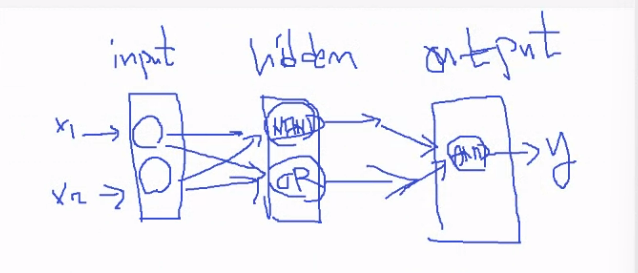

In [35]:
test_xdata = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

NAND_data = []
OR_data = []

for input_data in test_xdata:
    (sigmoid_val, logical_val1) = NAND_obj.predict(input_data)
    (sigmoid_val, logical_val2) = OR_obj.predict(input_data)
    NAND_data.append(logical_val1)
    OR_data.append(logical_val2)
    
    print(input_data, " = ", logical_val1)
    print(input_data, " = ", logical_val2)

[0 0]  =  1
[0 0]  =  0
[1 0]  =  1
[1 0]  =  1
[0 1]  =  1
[0 1]  =  1
[1 1]  =  0
[1 1]  =  1


In [36]:
NAND_data

[1, 1, 1, 0]

In [37]:
OR_data

[0, 1, 1, 1]

In [38]:
NAND_data[0]

1

In [48]:
xdata = np.array([[NAND_data[0], OR_data[0]], [NAND_data[1], OR_data[1]], [NAND_data[2], OR_data[2]], [NAND_data[3], OR_data[3]]])
print(xdata)
tdata = np.array([0, 1, 1, 0])

XOR_obj = LogicGate("AND_GATE", xdata, tdata)
XOR_obj.train()

[[1 0]
 [1 1]
 [1 1]
 [0 1]]
Initial loss value = 2.9027614040388077
step = 0 | loss value = 2.8840190618370602
step = 1000 | loss value = 1.230995337470002
step = 2000 | loss value = 0.785486154711539
step = 3000 | loss value = 0.5646073981591515
step = 4000 | loss value = 0.4365795525683611
step = 5000 | loss value = 0.35417650911816945
step = 6000 | loss value = 0.2971228750457253
step = 7000 | loss value = 0.25546386156567225
step = 8000 | loss value = 0.22379789719943227


In [53]:
test_xdata = xdata

for input_data in test_xdata:
    (sigmoid_val, logical_val) = AND_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[1 0]  =  0
[1 1]  =  1
[1 1]  =  1
[0 1]  =  0


In [54]:
test_tdata = np.array([0, 1, 1, 0])
accuracy_ret = XOR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


---

In [71]:
# XOR 학습코드
# NAND_obj, OR_obj, AND_obj 객체는 이미 생성된 것으로 가정.
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])

s1=[]  # NAND 출력
s2=[]  # OR 출력
new_input_data=[] # AND 입력
final_output=[] # AND 출력
test_xdata = [] # 정확치 계산

for index in range(len(input_data)):
    s1=NAND_obj.predict(input_data[index])  # NAND 출력
    s2=OR_obj.predict(input_data[index])  # OR 출력
  
    new_input_data.append(s1[-1])  # AND 입력
    new_input_data.append(s2[-1])  # OR 입력
    test_xdata.append([s1[-1], s2[-1]])
  
    (sigmoid_val, logical_val)=AND_obj.predict(np.array(new_input_data)) #s1, s2 입력
  
    final_output.append(logical_val)  # AND 출력, 즉 XOR 출력
    new_input_data=[]  # AND 입력 초기화
    
for index in range(len(input_data)):
    print(input_data[index], "=",final_output[index])
    
print(test_xdata)

[0 0] = 0
[0 1] = 1
[1 0] = 1
[1 1] = 0
[[1, 0], [1, 1], [1, 1], [0, 1]]


In [76]:
test_tdata = np.array([0, 1, 1, 0])

accuracy_ret = XOR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


---
### ANSWER

In [80]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 0, 0, 1])
AND_obj = LogicGate("AND_GATE", xdata, tdata)
AND_obj.train()
print("====================================================")

xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 1])
OR_obj = LogicGate("OR_GATE", xdata, tdata)
OR_obj.train()
print("====================================================")

xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([1, 1, 1, 0])
NAND_obj = LogicGate("NAND_GATE", xdata, tdata)
NAND_obj.train()

Initial loss value = 3.7235748121767682
step = 0 | loss value = 3.6873642533303252
step = 1000 | loss value = 1.0438176215976405
step = 2000 | loss value = 0.675458980344749
step = 3000 | loss value = 0.49986957395490306
step = 4000 | loss value = 0.3956659219763272
step = 5000 | loss value = 0.32663739816440085
step = 6000 | loss value = 0.27763277298946337
step = 7000 | loss value = 0.24111124285714408
step = 8000 | loss value = 0.21288618277072846
Initial loss value = 2.206765362957262
step = 0 | loss value = 2.2001136990060077
step = 1000 | loss value = 0.7690139058900745
step = 2000 | loss value = 0.4504618288347023
step = 3000 | loss value = 0.3132932818631021
step = 4000 | loss value = 0.23833984452927912
step = 5000 | loss value = 0.19156666300164066
step = 6000 | loss value = 0.1597753387670586
step = 7000 | loss value = 0.13683976431399245
step = 8000 | loss value = 0.11955026318159367
Initial loss value = 2.875335406979401
step = 0 | loss value = 2.8702652003272213
step = 10

In [79]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
s1 = []
s2 = []
new_input_data = []
final_output = []

for index in range(len(input_data)):
    s1 = NAND_obj.predict(input_data[index])
    s2 = OR_obj.predict(input_data[index])
    
    new_input_data.append(s1[-1])
    new_input_data.append(s2[-1])
    
    (sigmoid_val, logical_val) = AND_obj.predict(np.array(new_input_data))   # 확률값, 예측결과값
    final_output.append(logical_val)
    new_input_data = []
    
for index in range(len(input_data)):
    print(input_data[index], "=", final_output[index])
    

[0 0] = 0
[0 1] = 1
[1 0] = 1
[1 1] = 0
